In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url="data_sample copy.csv" 
data=pd.read_csv(url)

In [4]:
data

,sign_type,speed_limi,timestamp,Lon,Lat
0,Stop,0,25.08.2020 07:50,19.425918,51.806640
1,Stop,0,27.08.2020 21:55,19.589880,51.793748
2,Stop,0,01.08.2020 18:20,19.543983,51.711465
3,Stop,0,12.08.2020 07:50,19.480426,51.727488
4,Stop,0,05.08.2020 14:50,19.448819,51.758253
...,...,...,...,...,...
244509,Speed Limit,85,22.08.2020 13:55,19.445755,51.782282
244510,Speed Limit,85,07.08.2020 20:40,19.450990,51.789896
244511,Speed Limit,85,30.08.2020 19:35,19.447302,51.756703
244512,Speed Limit,85,01.08.2020 13:30,19.495367,51.805601


In [5]:
data['timestamp'] = pd.to_datetime(data['timestamp']) #we are changing dtype to datetime64

In [6]:
#number of observations:
data.shape

(244514, 5)

In [7]:
#row:
data.shape[0]

244514

In [8]:
#columns:
data.shape[1]

5

In [9]:
#indexed :
data.index

RangeIndex(start=0, stop=244514, step=1)

In [10]:
#datatypes :
data.dtypes

sign_type             object
speed_limi             int64
timestamp     datetime64[ns]
Lon                  float64
Lat                  float64
dtype: object

In [11]:
data.timestamp.describe(datetime_is_numeric=True) #analyzing timestamp

count                           244514
mean     2020-06-30 22:56:53.789803264
min                2020-01-08 00:00:00
25%                2020-04-08 18:55:00
50%                2020-08-18 07:10:00
75%                2020-08-26 23:20:00
max                2020-12-08 23:55:00
Name: timestamp, dtype: object

In [12]:
#how many different sign_type have:
data.sign_type.nunique()

5

In [13]:
data.sign_type.value_counts()

Speed Limit               184611
Yield                      52851
Withdrawal Speed Limit      3998
Stop                        3041
No Entry                      13
Name: sign_type, dtype: int64

In [14]:
#most frequent sign_type:
data.sign_type.value_counts().head(1)

Speed Limit    184611
Name: sign_type, dtype: int64

In [15]:
#summarize:
data.describe()

,speed_limi,Lon,Lat
count,244514.000000,244514.000000,244514.000000
mean,53.134872,19.487271,51.763045
std,38.940616,0.054160,0.030943
min,0.000000,19.418187,51.688998
25%,20.000000,19.442265,51.747177
50%,60.000000,19.479966,51.763835
75%,70.000000,19.506530,51.785088
max,130.000000,19.640141,51.818450


In [16]:
data.speed_limi.describe()

count    244514.000000
mean         53.134872
std          38.940616
min           0.000000
25%          20.000000
50%          60.000000
75%          70.000000
max         130.000000
Name: speed_limi, dtype: float64

In [17]:
#rename the true name of columns:
data.rename({'speed_limi':'speed_limit'},axis=1,inplace=True)

In [18]:
data.head()

,sign_type,speed_limit,timestamp,Lon,Lat
0,Stop,0,2020-08-25 07:50:00,19.425918,51.806640
1,Stop,0,2020-08-27 21:55:00,19.589880,51.793748
2,Stop,0,2020-01-08 18:20:00,19.543983,51.711465
3,Stop,0,2020-12-08 07:50:00,19.480426,51.727488
4,Stop,0,2020-05-08 14:50:00,19.448819,51.758253


In [19]:
data.info() #we dont have any NaN value!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244514 entries, 0 to 244513
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   sign_type    244514 non-null  object        
 1   speed_limit  244514 non-null  int64         
 2   timestamp    244514 non-null  datetime64[ns]
 3   Lon          244514 non-null  float64       
 4   Lat          244514 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 9.3+ MB


In [20]:
data.isna().sum() #we are sure we dont have any NaN value

sign_type      0
speed_limit    0
timestamp      0
Lon            0
Lat            0
dtype: int64

In [21]:
#least speed limit we see:
data.speed_limit.value_counts().tail()

130    26
25     19
35      3
45      3
65      2
Name: speed_limit, dtype: int64

In [22]:
data.speed_limit.sum()

12992220

In [23]:
data[data.speed_limit>100].nunique()

sign_type        1
speed_limit      3
timestamp      137
Lon            181
Lat            182
dtype: int64

In [24]:
data

,sign_type,speed_limit,timestamp,Lon,Lat
0,Stop,0,2020-08-25 07:50:00,19.425918,51.806640
1,Stop,0,2020-08-27 21:55:00,19.589880,51.793748
2,Stop,0,2020-01-08 18:20:00,19.543983,51.711465
3,Stop,0,2020-12-08 07:50:00,19.480426,51.727488
4,Stop,0,2020-05-08 14:50:00,19.448819,51.758253
...,...,...,...,...,...
244509,Speed Limit,85,2020-08-22 13:55:00,19.445755,51.782282
244510,Speed Limit,85,2020-07-08 20:40:00,19.450990,51.789896
244511,Speed Limit,85,2020-08-30 19:35:00,19.447302,51.756703
244512,Speed Limit,85,2020-01-08 13:30:00,19.495367,51.805601


In [25]:
data.head()

,sign_type,speed_limit,timestamp,Lon,Lat
0,Stop,0,2020-08-25 07:50:00,19.425918,51.806640
1,Stop,0,2020-08-27 21:55:00,19.589880,51.793748
2,Stop,0,2020-01-08 18:20:00,19.543983,51.711465
3,Stop,0,2020-12-08 07:50:00,19.480426,51.727488
4,Stop,0,2020-05-08 14:50:00,19.448819,51.758253


In [26]:
data.groupby(by=["timestamp","sign_type"]).speed_limit.mean()

timestamp            sign_type             
2020-01-08 00:00:00  Speed Limit               120.0
                     Yield                       0.0
2020-01-08 02:05:00  Speed Limit                55.0
2020-01-08 02:10:00  Speed Limit                40.0
                     Withdrawal Speed Limit      0.0
                                               ...  
2020-12-08 23:50:00  Speed Limit                64.0
                     Withdrawal Speed Limit      0.0
                     Yield                       0.0
2020-12-08 23:55:00  Speed Limit                60.0
                     Yield                       0.0
Name: speed_limit, Length: 20688, dtype: float64

In [27]:
data["date"]=data["timestamp"].dt.date

In [28]:
data.groupby(by=["date","sign_type"]).speed_limit.mean() #Average daily number of observations for each sign type

date        sign_type             
2020-01-08  Speed Limit               113.329939
            Stop                        0.000000
            Withdrawal Speed Limit      0.000000
            Yield                       0.000000
2020-01-09  Speed Limit                62.083333
                                         ...    
2020-11-08  Yield                       0.000000
2020-12-08  Speed Limit                57.939643
            Stop                        0.000000
            Withdrawal Speed Limit      0.000000
            Yield                       0.000000
Name: speed_limit, Length: 138, dtype: float64

In [31]:
data['year_month'] = data['timestamp'].dt.strftime('%Y-%m')# creating year month

In [32]:
data.year_month

0         2020-08
1         2020-08
2         2020-01
3         2020-12
4         2020-05
           ...   
244509    2020-08
244510    2020-07
244511    2020-08
244512    2020-01
244513    2020-04
Name: year_month, Length: 244514, dtype: object

In [33]:
data.groupby(by=["date","sign_type"]).speed_limit.describe().sort_values(by="date") #changes of observations amount during day

count        mean        std   min  \
date       sign_type                                                      
2020-01-08 Speed Limit             40753.0  113.329939  19.832766   5.0   
           Stop                       84.0    0.000000   0.000000   0.0   
           Withdrawal Speed Limit    124.0    0.000000   0.000000   0.0   
           Yield                    1786.0    0.000000   0.000000   0.0   
2020-01-09 Speed Limit                24.0   62.083333  11.412871  40.0   
...                                    ...         ...        ...   ...   
2020-11-08 Yield                    1717.0    0.000000   0.000000   0.0   
2020-12-08 Withdrawal Speed Limit    132.0    0.000000   0.000000   0.0   
           Speed Limit              4987.0   57.939643  15.594933   0.0   
           Stop                       78.0    0.000000   0.000000   0.0   
           Yield                    1726.0    0.000000   0.000000   0.0   

                                     25%    50%    75%    max  
date       sign_type                                           
2020-01-08 Speed Limit             120.0  120.0  120.0  120.0  
           Stop                      0.0    0.0    0.0    0.0  
           Withdrawal Speed Limit    0.0    0.0    0.0    0.0  
           Yield                     0.0    0.0    0.0    0.0  
2020-01-09 Speed Limit              50.0   70.0   70.0   70.0  
...                                  ...    ...    ...    ...  
2020-11-08 Yield                     0.0    0.0    0.0    0.0  
2020-12-08 Withdrawal Speed Limit    0.0    0.0    0.0    0.0  
           Speed Limit              40.0   60.0   70.0  130.0  
           Stop                      0.0    0.0    0.0    0.0  
           Yield                     0.0    0.0    0.0    0.0  

[138 rows x 8 columns]

In [34]:
data.groupby(by=["year_month","sign_type"]).speed_limit.mean() #changes of observations amount during month

year_month  sign_type             
2020-01     Speed Limit               113.299777
            Stop                        0.000000
            Withdrawal Speed Limit      0.000000
            Yield                       0.000000
2020-02     No Entry                    0.000000
            Speed Limit                57.974070
            Stop                        0.000000
            Withdrawal Speed Limit      0.000000
            Yield                       0.000000
2020-03     Speed Limit                58.138635
            Stop                        0.000000
            Withdrawal Speed Limit      0.000000
            Yield                       0.000000
2020-04     Speed Limit                58.246979
            Stop                        0.000000
            Withdrawal Speed Limit      0.000000
            Yield                       0.000000
2020-05     Speed Limit                58.587593
            Stop                        0.000000
            Withdrawal Speed Limit

In [35]:
data_speedlimit=data[data["sign_type"]=="Speed Limit"]

In [36]:
data_speedlimit

,sign_type,speed_limit,timestamp,Lon,Lat,date,year_month
54,Speed Limit,30,2020-12-08 07:35:00,19.454612,51.758944,2020-12-08,2020-12
57,Speed Limit,60,2020-07-08 10:20:00,19.458092,51.802667,2020-07-08,2020-07
58,Speed Limit,70,2020-08-28 16:50:00,19.583121,51.753032,2020-08-28,2020-08
59,Speed Limit,20,2020-06-08 19:25:00,19.574818,51.715046,2020-06-08,2020-06
60,Speed Limit,50,2020-08-24 16:55:00,19.435819,51.754248,2020-08-24,2020-08
...,...,...,...,...,...,...,...
244509,Speed Limit,85,2020-08-22 13:55:00,19.445755,51.782282,2020-08-22,2020-08
244510,Speed Limit,85,2020-07-08 20:40:00,19.450990,51.789896,2020-07-08,2020-07
244511,Speed Limit,85,2020-08-30 19:35:00,19.447302,51.756703,2020-08-30,2020-08
244512,Speed Limit,85,2020-01-08 13:30:00,19.495367,51.805601,2020-01-08,2020-01


In [37]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [38]:
url="data_sample copy.csv" 
data=pd.read_csv(url)

In [39]:
data.head()

,sign_type,speed_limi,timestamp,Lon,Lat
0,Stop,0,25.08.2020 07:50,19.425918,51.806640
1,Stop,0,27.08.2020 21:55,19.589880,51.793748
2,Stop,0,01.08.2020 18:20,19.543983,51.711465
3,Stop,0,12.08.2020 07:50,19.480426,51.727488
4,Stop,0,05.08.2020 14:50,19.448819,51.758253


<AxesSubplot:xlabel='sign_type'>

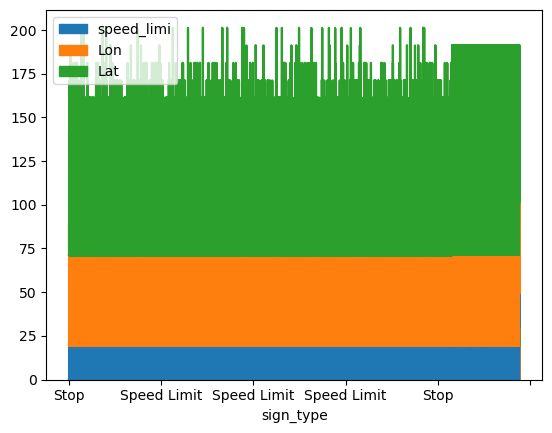

In [40]:
data.plot.area(x='sign_type')


In [45]:
data['timestamp'] = pd.to_datetime(data['timestamp'])


<AxesSubplot:>

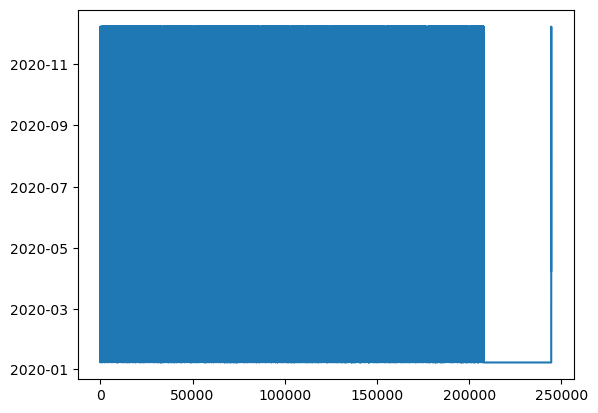

In [47]:
data.timestamp.plot()